<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Ricardo Espinoza
- Nombre de alumno 2: Cristóbal Guerra


### **Link de repositorio de GitHub:** `https://github.com/cristobalg68/Labs-Espinoza-Guerra.git`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall:

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
path = '/content/drive/Othercomputers/Mi PC/Estudios/Universidad/Semestre_2023_1/Laboratorio_de_Programación_Científica_para_Ciencia_de_Datos/Laboratorios/Lab_6/online_retail_II.pickle'

In [4]:
df_retail = pd.read_pickle(path)
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


> El Dataset cuenta con 8 columnas, estas se describen a continuación:

  * Invoice: Es el número de la factura al que esta asociado el producto que se compro.

  * StockCode: Es el código del producto que se compro.

  * Description: Es la descripción del producto que se compro.

  * Quantity: Es la cantidad del producto que se compro en esa factura.

  * InvoiceDate: Es la fecha de la factura.

  * Price: Es el precio unitario del producto que se esta comprando.

  * Customer ID: Es el ID del cliente.

  * Country: Es el país donde se efectuo la compra.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos]

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable es cuando se analiza una variable de forma idependiente (tipo, estadística, cantidad de ceros, vacíos, duplicados, etc). Un análisis multivariable es aquel que considera un conjunto de variables a analizar (se revisan correlaciones, entre otras cosas). El análisis de datos faltantes es cuando se buscan filas o columnas que tengan algún valor faltante (típicamente se buscan nan's (Not a Number)). Es de valor estudiar estos datos, pues nos ayuda a decidir qué técnica ocupar, nos simplifica el problema en algunos casos y además le facilitamos el trabajo a los algoritmos de clasificación.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie.

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [6]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

    Luego de analizar, se puede apreciar que esta serie no tiene ningún problema, pues por su naturaleza puede tener filas duplicadas y tantos valores únicos como se desee, además, no contiene valores faltantes. Notar que el invoice que más artículos llevo fue la 537434 con 675 artículos.

In [7]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

    Luego de analizar, se puede concluir que esta serie no tiene ningún problema. Esta no tiene valores faltantes y por su naturaleza puede darse el caso de que tenga duplicados. Notar que puede darse el caso de que existan duplicados, ya que distintos invoice pueden llevar el mismo código de producto. Además, resaltar que el producto más vendido entre todos los países fue él con código 85123A con una frecuencia de 3516. También, al observar los valores únicos y suponiendo que el código de producto es único, se podría concluir que la tienda tiene 4632 productos distintos.

In [8]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

    Luego de analizar, se puede apreciar que esta serie no tiene ningún problema, pues por su naturaleza puede tener filas duplicadas y tantos valores únicos como se desee, además, no contiene valores faltantes. Notar que la descripción con mayor frecuencia es WHITE HANGING HEART T-LIGHT HOLDER con una frecuencia de 3549. Algo que produce ruido de la comparación entre esta serie y la anterior, es la diferencia de frecuencias de los TOPS, además de la cantidad de productos únicos, pues se podría suponer que la cantidad de únicos debería calzar con la de la serie anterior.

In [9]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

    Luego de analizar la serie, se observa que el 2,35% de sus valores para la cantidad son negativos (12326 valores), con el valor mínimo siendo -9.600. Lo cual no tiene sentido pues no debiera ser posible vender en cantidades negativas. Asimismo, se observa que la media es 10,337667 y la columna no presenta valores 0, lo cual tiene sentido pues no sería posible realizar una venta por cero cantidades de un producto.

    Además, se nota que existe una cantidad no menor de outliers y que las cantidades vendidas distribuyen de manera exponencial para ambos casos (con y sin outliers).

In [10]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

    Luego de analizar, se puede concluir que esta serie no tiene ningún problema. Esta no tiene valores faltantes y por su naturaleza puede darse el caso de que tenga duplicados, pues una misma factura pude contener múltiples productos y todos deberían salir con la misma fecha de la factura. Además, por el mínimo y máximo, se podría concluir que los datos consideran las ventas desde el 2009-12-01 07:45:00 hasta el 2010-12-09 20:01:00.

In [11]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Luego de analizar la serie, se observa que 3 de sus valores para el precio son negativos, con el valor mínimo siendo -53.594,36 . Lo cual no tiene sentido pues no debiera ser posible tener precios negativos. Asimismo, se observa que la media es 4,688834 y la columna presenta 3.687 valores cero (0,7% del total), lo cual no necesariamente tiene sentido ya que no es posible vender productos a precio cero.

    Además, se nota que existen algunos outliers y que el precio distribuye de manera exponencial para ambos casos (con y sin outliers).


In [12]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

    Luego de analizar, se puede concluir que esta serie podría tener un problema, pues contiene una gran cantidad de datos faltantes. Esto último no se puede confirmar, ya que puede ser que la tienda tenga facturas de clientes no registrados, cosa que no sería un problema. Además, por su naturaleza puede darse el caso de que tenga duplicados, pues un mismo cliente pude comprar múltiples productos en múltiples facturas. Notar que el cliente con ID 14911 ha comprado 5710 productos en toda la historia del Dataset. Tambien, se pueder ver que la tienda tiene 4383 clientes registrados.


In [13]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Luego de analizar la serie, se concluye que no tiene problemas, pues el país si puede estar duplicado y además no existen valores faltantes. Además, se puede apreciar que el Dataset contempla 40 países, de los cuales el que más se repite es United Kingdom con una frecuencia de 485852.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [14]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)


    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i])
            plt.ylabel(list_type[j])
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

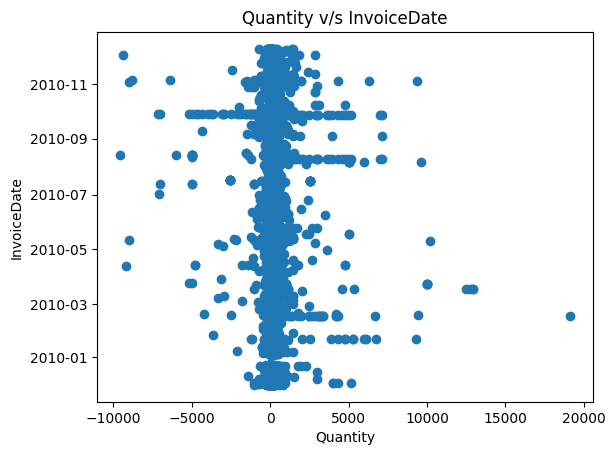

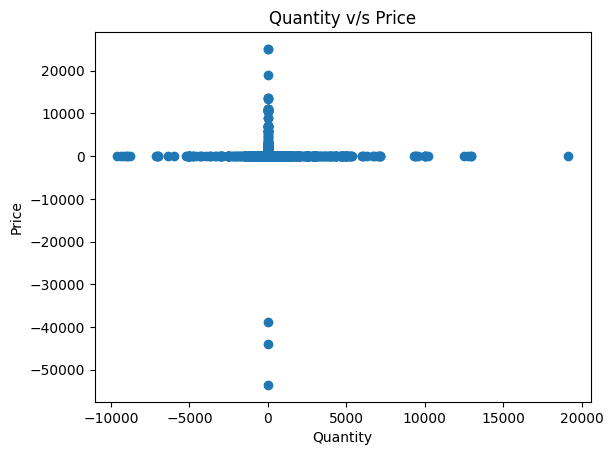

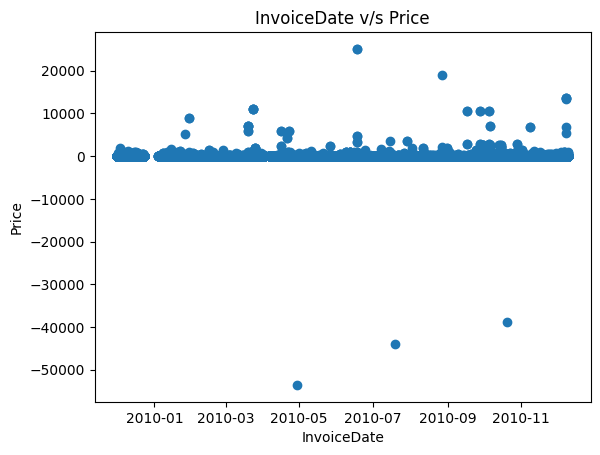

## Correlation:

## Missing Matrix:

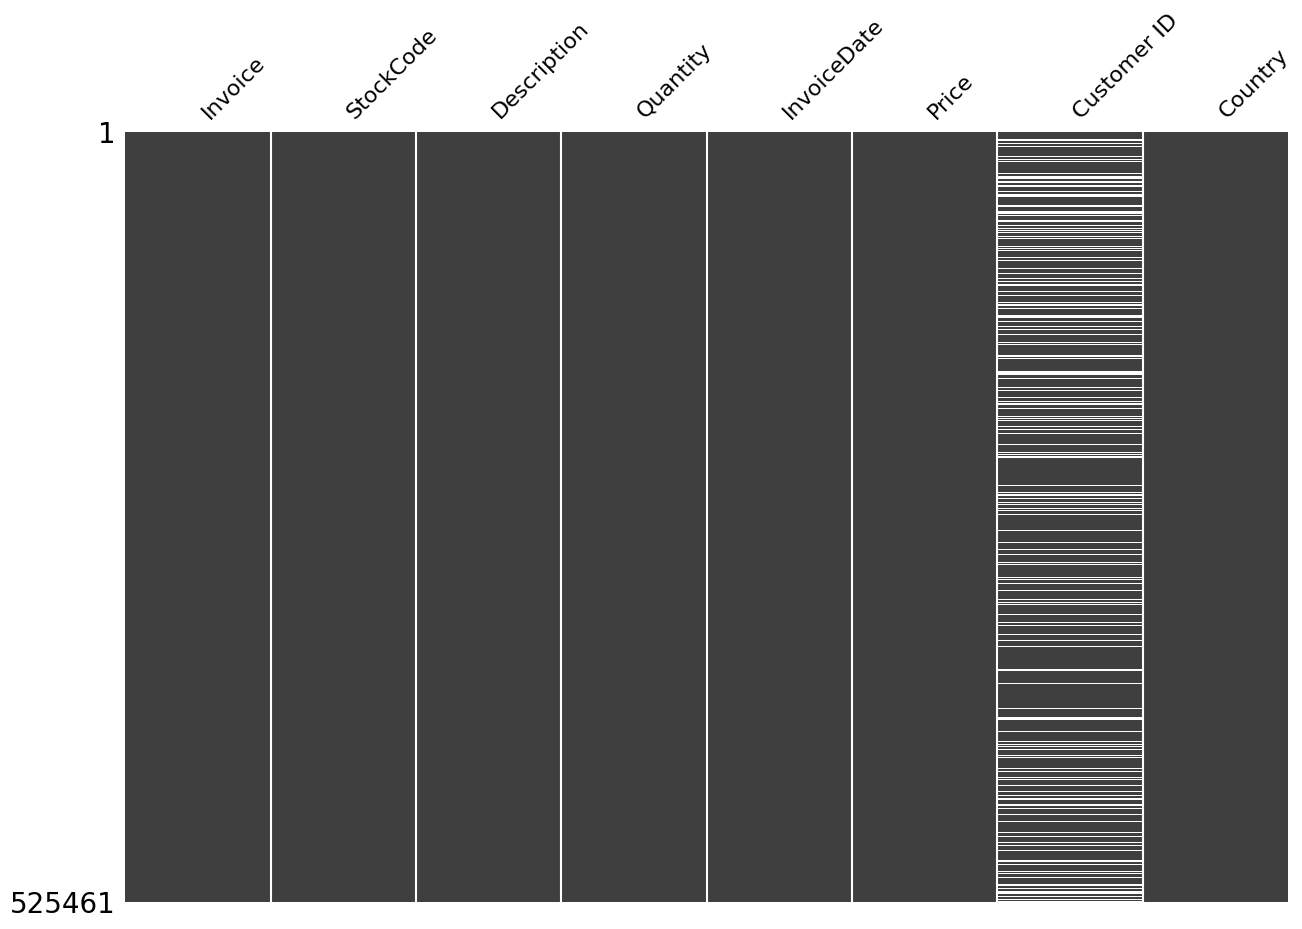

In [15]:
profile_df(df_retail)

    Del análisis multivariables se puede concluir:
    * De los gráficos de dispersión se puede concluir:
      * Del gráfico de dispersión Quantity v/s InvoiceDate: La cantidad oscila en torno a cero y existe una cantidad no menor de outliers tanto positivo como negativos. Ademas, se notan cantidades que son negativas, lo cual no deberia ser posible.
      * Del gráfico de dispersión Quantity v/s Precio: Un gran número de cantidades vendidas oscila en torno al precio cero. Además, para precios mayores a cero las cantidades tienden a oscilar también en torno a cero, indicando que se compran pocos artículos a medida que el precio aumenta. También se observan outliers cuyas cantidades oscilan a cero para precios muy altos y muy bajos. Se notan cantidades y precios que son negativos, lo cual no deberia ser posible.
      * Del gráfico de dispersión Precio v/s Invoice: El precio se mantiene relativamente constante en torno a cero en el tiempo, con muy pocos outliers para precios muy altos y muy bajos. Notar que nuevamente se aprecian precios negativos, lo que debe ser un error.
    * No existe ninguna correlación entre las variables, ya que así lo indica la matriz de correlación.
    * De la Missing Matrix se puede concluir lo que ya se había mencionado en los análisis univariables, que la mayoría de columnas no tenía valores faltantes, salvo por la columna Customer ID.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Dado que el Customer ID deberia ser el mismo para todas las facturas de un cliente, se revisar si existe algun registro que permita llenar los valores faltantes de algun grupo de facturas.

In [16]:
for group in df_retail.groupby('Invoice')['Customer ID']:
    if (len(group[1]) > group[1].isnull().sum()) and (group[1].isnull().sum() > 0):
        print(group[0])

Como se revisó en el ciclo for anterior, no existe ningún grupo de facturas con valores faltantes que tenga algún registro en donde si se tenga el Customer ID para ser llenado, por tanto, existen tres posibilidades. La primera es eliminar todas las filas que tengan algún valor faltante para la columna Customer ID, la segunda es imputar los datos faltantes con alguna técnica que asegure que el Customer ID sea diferente a todos los otros Customer ID, pues se podría suponer que los registros con valores faltantes para esta columna son de clientes distintos a los otros. La tercera alternativa es eliminar dicha columna.

Por simplicicdad, se decidio eliminar las filas que tengan valores faltantes en esta columna.

Ademas de lo anterior, se eliminan todas las filas con Quantity menores a ceros, con Price menores a ceros y se trataran los outliers. Notar que para el tratamiento de outliers se utilizaron los límites sugeridos en el análisis univariable de las variables con outliers.

In [17]:
def dataset_cleaning(dataframe_in):
    dataframe_in = dataframe_in[(dataframe_in['Quantity'] >= 0) & (dataframe_in['Quantity'] <= 100)]
    dataframe_in = dataframe_in[(dataframe_in['Price'] > 0) & (dataframe_in['Price'] <= 122.3)]
    dataframe_in = dataframe_in.drop_duplicates(subset=['Invoice','StockCode'])
    return dataframe_in.dropna()

In [18]:
df_retail_v2 = dataset_cleaning(df_retail)

In [19]:
profile_serie(df_retail_v2['Invoice'])

## Invoice Profile

Type                           category
Number of observations           389526
Unique                            18636
Top                              500356
Freq                                249
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   388034
Duplicate rows (%)              99.62 %
Total size in memory      5182596 bytes
dtype: object

In [20]:
profile_serie(df_retail_v2['StockCode'])

## StockCode Profile

Type                           category
Number of observations           389526
Unique                             4001
Top                              85123A
Freq                               2965
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   389356
Duplicate rows (%)              99.96 %
Total size in memory      4064452 bytes
dtype: object

In [21]:
profile_serie(df_retail_v2['Description'])

## Description Profile

Type                                                  object
Number of observations                                389526
Unique                                                  4426
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    2965
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        389312
Duplicate rows (%)                                   99.95 %
Total size in memory                           6232416 bytes
dtype: object

In [22]:
profile_serie(df_retail_v2['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         389526.0
Mean                           9.407983
Std                           13.383508
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                               100.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          17.486064
Skew                           3.667611
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   389519
Duplicate rows (%)              100.0 %
Total size in memory      6232416 bytes
dtype: object

In [23]:
profile_serie(df_retail_v2['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           389526
Mean                      2010-07-01 04:07:26.190909440
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 13:50:00
50%                                 2010-07-08 20:00:00
75%                                 2010-10-14 13:11:15
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   388249
Duplicate rows (%)                              99.67 %
Total size in memory                      6232416 bytes
dtype: object

In [24]:
profile_serie(df_retail_v2['Price'])

## Price Profile

Type                            float64
Number of observations         389526.0
Mean                           3.056766
Std                            3.533105
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                               119.6
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                         111.017655
Skew                           6.819015
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   389429
Duplicate rows (%)              99.98 %
Total size in memory      6232416 bytes
dtype: object

In [25]:
profile_serie(df_retail_v2['Country'])

## Country Profile

Type                              object
Number of observations            389526
Unique                                37
Top                       United Kingdom
Freq                              354262
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    389526
Duplicate rows (%)               100.0 %
Total size in memory       6232416 bytes
dtype: object

## Bivariant Analysis:

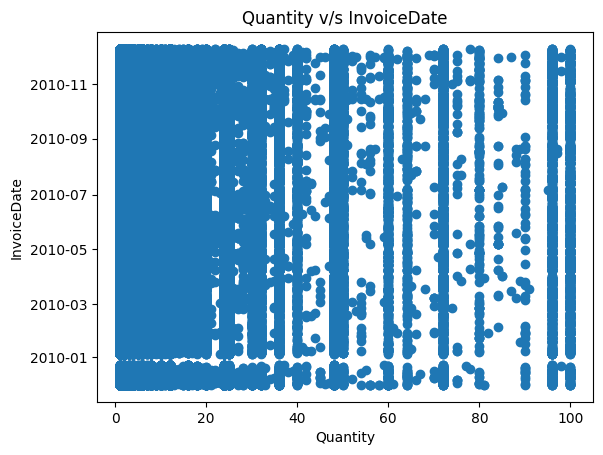

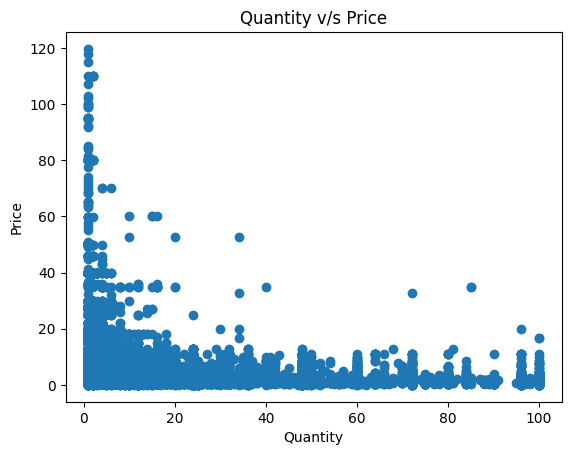

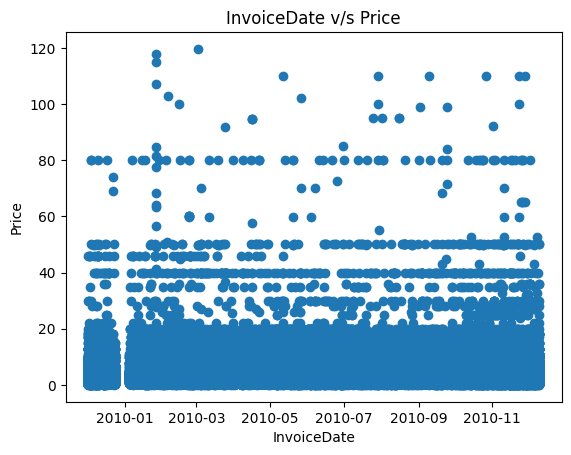

## Correlation:

## Missing Matrix:

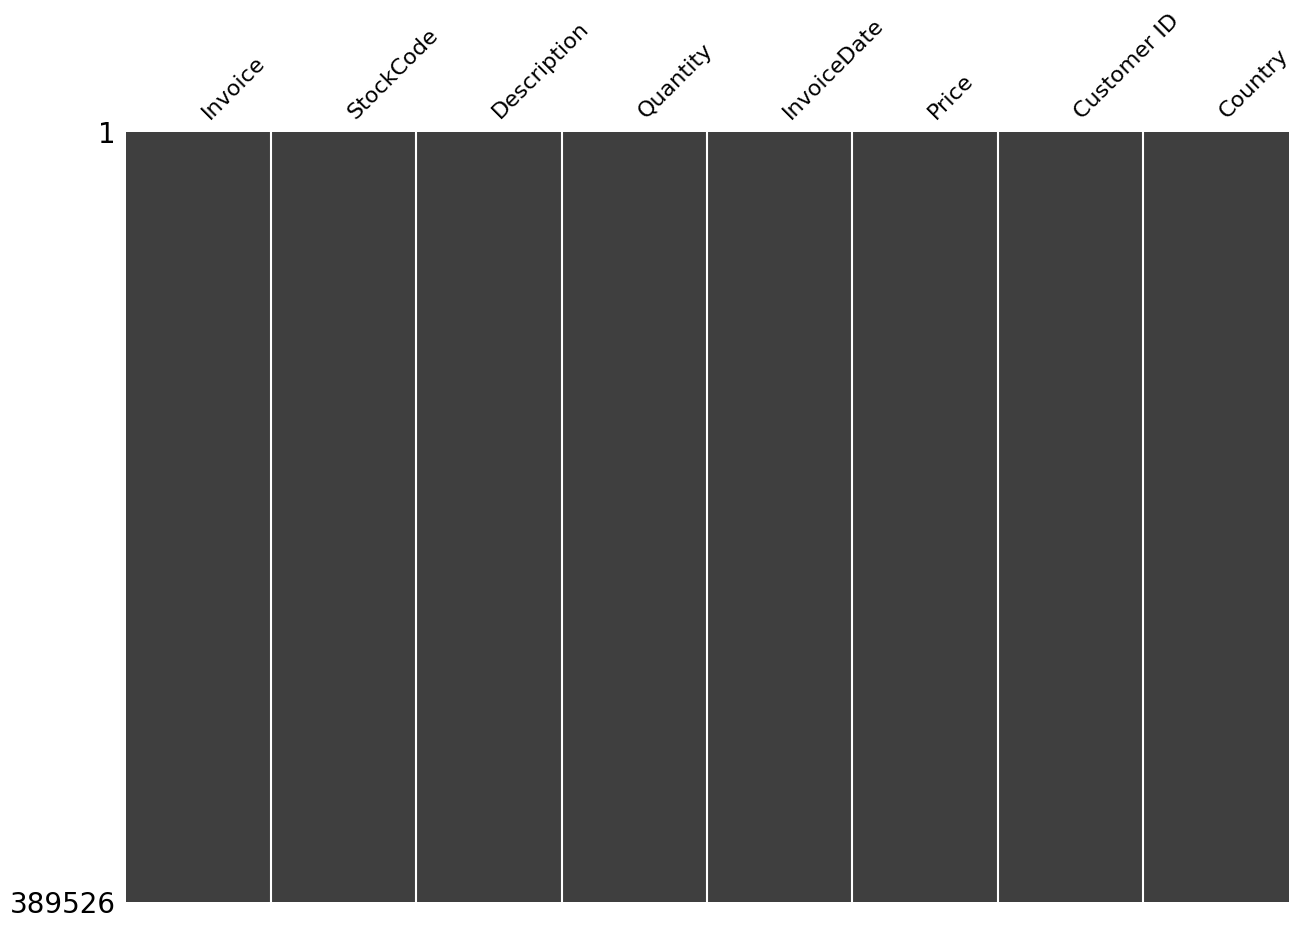

In [26]:
profile_df(df_retail_v2)

Del anterior análisis, se puede concluir en términos generales lo siguiente:
* Análisis univariado: de este se nota que las variables que presentaban inconsistencias y errores lógicos, ya no lo hacen pues se eliminaron los valores negativos y los outliers en las variables "Quantity" y "Price", asimismo, se eliminaron los ceros en la variable "Price" ya que no tiene sentido que una venta se haya realizado a precio cero. Con respecto a "Customer ID", ya no existen problemas de datos faltantes pues se eliminaron todas las filas que contenian vacíos. El resto de variables se mantienen sin problemas, al igual que antes.
* Análisis multivariado: de este se nota que en los tres primeros gráficos ya no existen valores negativos para "Quantity" y "Price" pues se eliminaron, lo mismo con los valores cero de la variable "Price". Por lo que ahora es posible visualizar con más cercanía la relación entre las variables, en particular se nota que la cantidad se comporta relativamente constante en el tiempo, la cantidad y precio se comportan de manera inversa pues a mayor precio, menor cantidad comprada de un producto y viceversa (también evidenciable en la matriz de correlación, con una correlación negativa ~-0,2 entre ambas variables). Del tercer gráfico, se nota que el precio también se comporta de manera relativamente constante en el tiempo. De la matriz de correlación se nota que ahora la correlación entre "Quantity" y "Price" es negativa en lugar de 0 como antes, lo cual concuerda con lo anteriormente dicho, mientras que la correlación entre las demás variables se mantiene en 0. Por último, del quinto gráfico se nota que por haber eliminado las filas que contenian nulos, ya no existen vacíos en el dataset.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [27]:
df_retail_v2['Ingresos'] = df_retail_v2['Quantity'] * df_retail_v2['Price']
cantidades_ingresos_sum = df_retail_v2[['Description', 'Quantity', 'Ingresos']].groupby('Description').sum()
top_30_ingresos = cantidades_ingresos_sum.sort_values('Ingresos', ascending=False).head(30)
fig = px.bar(top_30_ingresos, y='Ingresos', title="Top 30 productos segun Ingresos")
fig.show()
top_30_cantidades = cantidades_ingresos_sum.sort_values('Quantity', ascending=False).head(30)
fig = px.bar(top_30_cantidades, y='Quantity', title="Top 30 productos segun Quantity")
fig.show()

In [28]:
top_30_ingresos.merge(top_30_cantidades, how='inner', on='Description')

,Quantity_x,Ingresos_x,Quantity_y,Ingresos_y
Description,,,,
REGENCY CAKESTAND 3 TIER,10529,122286.15,10529,122286.15
WHITE HANGING HEART T-LIGHT HOLDER,40802,110521.44,40802,110521.44
JUMBO BAG RED RETROSPOT,20215,36207.45,20215,36207.45
ASSORTED COLOUR BIRD ORNAMENT,21346,35934.58,21346,35934.58
LUNCH BAG RED SPOTTY,16269,25561.05,16269,25561.05
STRAWBERRY CERAMIC TRINKET BOX,20673,24550.77,20673,24550.77
JUMBO STORAGE BAG SUKI,13485,24410.75,13485,24410.75
JUMBO BAG STRAWBERRY,13447,24301.65,13447,24301.65
JUMBO BAG BAROQUE BLACK WHITE,12158,22046.10,12158,22046.10


> Al ver el gráfico anterior se puede aseverar que los productos que generan más ingresos no son los que más se venden, pues el producto que más ingresos generó tiene una menor cantidad de ventas que el segundo artículo que más ganancias generó.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [33]:
def plot_ventas(dataframe):
    dataframe['NewDate'] = pd.to_datetime(dataframe['InvoiceDate']).dt.date
    ventas_por_dia = dataframe[['NewDate', 'Quantity', 'Ingresos']].groupby('NewDate').sum()
    fig = px.bar(ventas_por_dia, y='Quantity', title="Ventas con respecto al tiempo")
    fig.show()
    fig = px.bar(ventas_por_dia, y='Ingresos', title="Ingresos con respecto al tiempo")
    fig.show()

In [34]:
plot_ventas(df_retail_v2)

> Al revisar el gráfico, se pueden apreciar tres días en donde la tienda tuvo ventas totales diarias negativas. De la misma forma, se puede apreciar en varias instancias existen peaks positivos que se salen de la normal. Esto podría deberse a que esas fechas calzan con feriados o festividades, implicando un mayor número de ventas a lo largo de todas las tiendas, generando este efecto.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>